In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Example DataFrame
results_df = pd.DataFrame(columns=['bert_model', 'train_accuracy', 'train_loss', 'train_time',
                                   'val_accuracy', 'val_loss', 'val_time',
                                   'test_accuracy', 'test_precision', 
                                   'test_recall', 'test_F1'])

# Assuming you have stored each metric in a variable, add them to the DataFrame
# Repeat for each model

bert_models = ["bert-base-uncased",
               "roberta-base",
               "deberta-base",
               "albert-base-v2",
                "distilbert-base-uncased",
               ]

train_accuracy = []
train_loss = []
train_time = []
val_accuracy = []
val_loss = []
val_time = []
test_accuracy = []
test_precision = []
test_recall = []
test_F1 = []

fine_tuning_stats_dict = {}

from datetime import datetime

for bert_model in bert_models:
    stats = pd.read_csv(f"{bert_model}/fine_tuning_statistics.csv")
    fine_tuning_stats_dict[bert_model] = stats

    train_accuracy.append(stats['train_accuracy'].iloc[-1])
    train_loss.append(stats['train_loss'].iloc[-1])
    train_time_formatted = datetime.strptime(stats['train_time'].iloc[-1], "%H:%M:%S")
    train_time_in_seconds = train_time_formatted.hour * 3600 + train_time_formatted.minute * 60 + train_time_formatted.second
    train_time.append(train_time_in_seconds)
    val_accuracy.append(stats['val_accuracy'].iloc[-1])
    val_loss.append(stats['val_loss'].iloc[-1])
    val_time_formatted = datetime.strptime(stats['val_time'].iloc[-1], "%H:%M:%S")
    val_time_in_seconds = val_time_formatted.hour * 3600 + val_time_formatted.minute * 60 + val_time_formatted.second
    val_time.append(val_time_in_seconds)

testing_results_known_labels = {}

for bert_model in bert_models:
    stats = pd.read_csv(f"{bert_model}/testing_results_known_labels.csv")
    testing_results_known_labels[bert_model] = stats

    true_is_duplicate, predicted_is_duplicate = stats['true_label'], stats['predicted_label']
    
    true_label = 0
    false_label = 1
    accuracy = np.mean(true_is_duplicate == predicted_is_duplicate)
    precision = np.sum((predicted_is_duplicate == true_label) & (true_is_duplicate == true_label)) / np.sum(predicted_is_duplicate == true_label)
    recall = np.sum((predicted_is_duplicate == true_label) & (true_is_duplicate == true_label)) / np.sum(true_is_duplicate == true_label)
    F1 = 2 * precision * recall / (precision + recall)

    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_F1.append(F1)

results_df = pd.DataFrame({
    'bert_model': bert_models,
    'train_accuracy': train_accuracy,
    'train_loss': train_loss,
    'train_time_per_epoch_seconds': train_time,
    'val_accuracy': val_accuracy,
    'val_loss': val_loss,
    'val_time_per_epoch_seconds': val_time,
    'test_accuracy': test_accuracy,
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_F1': test_F1
})

# round whole dataframe to 6 decimals
results_df = results_df.round(6)
results_df.to_csv('all_bert_models_statistics.csv', index=False)  
# Add rows for RoBERTa, ALBERT, DistilBERT, and DeBERTa similarly

results_df.head()

,bert_model,train_accuracy,train_loss,train_time_per_epoch_seconds,val_accuracy,val_loss,val_time_per_epoch_seconds,test_accuracy,test_precision,test_recall,test_F1
0,bert-base-uncased,0.988901,0.054988,1031,0.921143,0.506773,4,0.951373,0.941364,0.948215,0.944777
1,roberta-base,0.979696,0.111579,1094,0.917714,0.476586,4,0.950557,0.945455,0.941614,0.943531
2,deberta-base,0.984280,0.083089,1588,0.946286,0.329927,6,0.949146,0.941067,0.943138,0.942101
3,albert-base-v2,0.965108,0.181484,531,0.865714,0.771947,4,0.933333,0.914612,0.935353,0.924866
4,distilbert-base-uncased,0.988382,0.057282,579,0.901714,0.605096,2,0.947587,0.940261,0.940261,0.940261


In [3]:
bert_models = ["bert-base-uncased",
               "roberta-base",
               "albert-base-v2",
                "distilbert-base-uncased",
                "deberta-base",
               ]

fine_tuning_stats_dict = {}

for bert_model in bert_models:
    stats = pd.read_csv(f"{bert_model}/fine_tuning_statistics.csv")
    fine_tuning_stats_dict[bert_model] = stats

Text(0.5, 1.0, 'Model comparison')

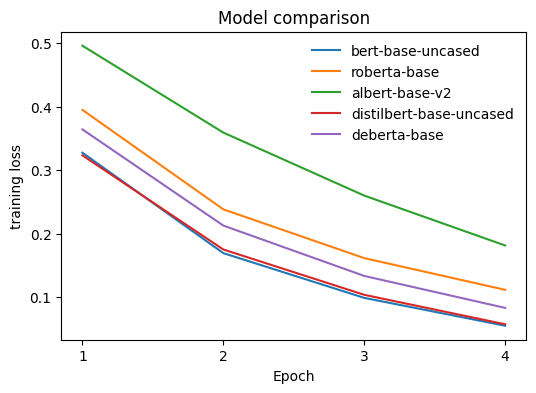

In [4]:
plt.figure(figsize=(6, 4))
for bert_model, stats in fine_tuning_stats_dict.items():
    plt.plot(stats["epoch"], stats["train_loss"], label=f"{bert_model}")
    #plt.plot(stats["epoch"], stats["val_loss"], label=f"{bert_model} Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("training loss")
plt.xticks([1,2,3,4])
plt.legend(frameon=False)
plt.title("Model comparison")

Text(0.5, 1.0, 'Model comparison')

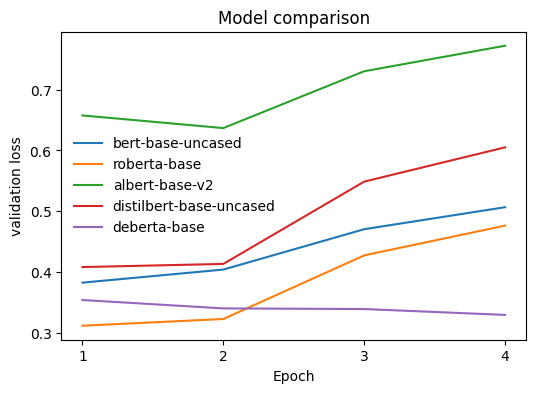

In [5]:
plt.figure(figsize=(6, 4))
for bert_model, stats in fine_tuning_stats_dict.items():
    #plt.plot(stats["epoch"], stats["train_loss"], label=f"{bert_model}")
    plt.plot(stats["epoch"], stats["val_loss"], label=f"{bert_model}")

plt.xlabel("Epoch")
plt.ylabel("validation loss")
plt.xticks([1,2,3,4])
plt.legend(frameon=False)
plt.title("Model comparison")

Text(0.5, 1.0, 'Model comparison')

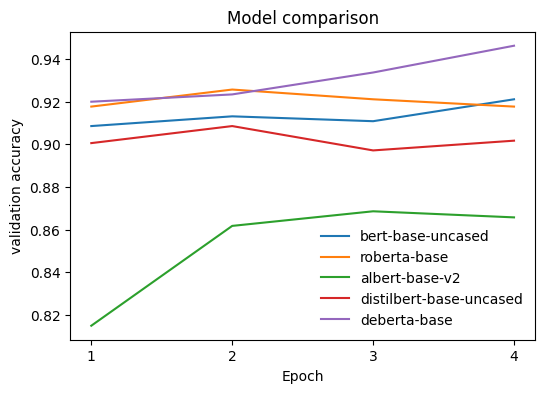

In [6]:
plt.figure(figsize=(6, 4))
for bert_model, stats in fine_tuning_stats_dict.items():
    #plt.plot(stats["epoch"], stats["train_loss"], label=f"{bert_model}")
    plt.plot(stats["epoch"], stats["val_accuracy"], label=f"{bert_model}")

plt.xlabel("Epoch")
plt.ylabel("validation accuracy")
plt.xticks([1,2,3,4])
plt.legend(frameon=False)
plt.title("Model comparison")

Text(0.5, 1.0, 'Model comparison')

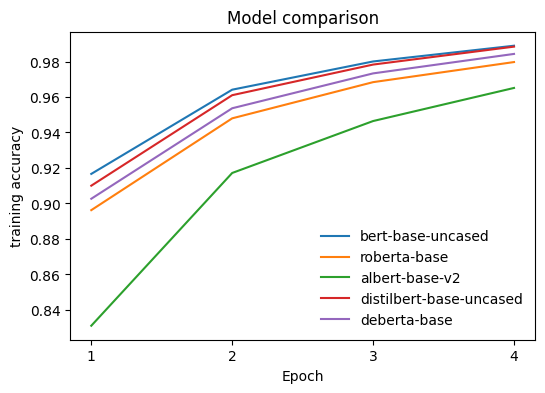

In [7]:
plt.figure(figsize=(6, 4))
for bert_model, stats in fine_tuning_stats_dict.items():
    #plt.plot(stats["epoch"], stats["train_loss"], label=f"{bert_model}")
    plt.plot(stats["epoch"], stats["train_accuracy"], label=f"{bert_model}")

plt.xlabel("Epoch")
plt.ylabel("training accuracy")
plt.xticks([1,2,3,4])
plt.legend(frameon=False)
plt.title("Model comparison")

### Dont use this graph yet Mr Long

[0.4845 0.453  0.206  0.7345 0.7105]


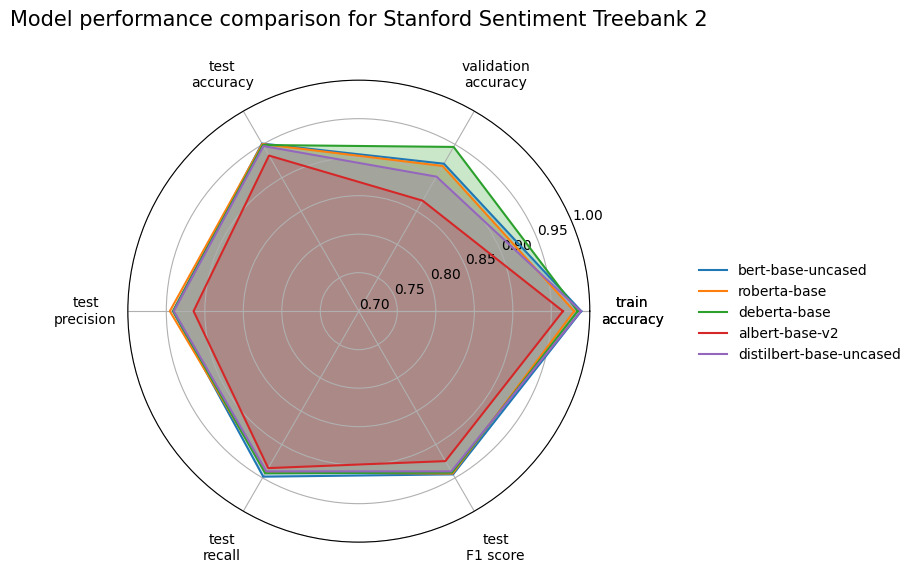

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

models = ['bert-base-uncased', 'roberta-base', 'deberta-base', 'albert-base-v2', 'distilbert-base-uncased']

x_max = 2000
x_min = 0
normalized_train_time = 1 - (np.array(train_time) - x_min) / (x_max - x_min)
print(normalized_train_time)

# Data from the user's input
data = {
    #'train_time_one_epoch_seconds': normalized_train_time,
    'train_accuracy': train_accuracy,
    'val_accuracy': val_accuracy,
    'test_accuracy': test_accuracy,
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_F1': test_F1,
}


# Creating DataFrame
df = pd.DataFrame(data)

df.head()

# Scaling and inverting the training time so lower is better
scaler = MinMaxScaler()
df = df.to_numpy()

# Set up the radar chart
labels = [
    #"training time\nper epoch\n(seconds)",
    "train\naccuracy",
    "validation\naccuracy",
    "test\naccuracy",
    "test\nprecision",
    "test\nrecall",
    "test\nF1 score"
]
num_vars = len(labels)
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
df = np.concatenate((df, df[:, [0]]), axis=1)  # Close the circle
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for i, row in enumerate(df):

    ax.plot(angles, row, label=models[i])
    ax.fill(angles, row, alpha=0.25)

ax.set_xticks(angles)
ax.set_xticklabels(labels + labels[:1], fontsize=10)
ax.tick_params(axis='x', which='major', pad=20)
ax.set_ylim([0.7, 1.0])
# Title and legend
plt.title('Model performance comparison for Stanford Sentiment Treebank 2', size=15, color='black', y=1.1)
plt.legend(frameon=False,loc='upper right', bbox_to_anchor=(1.7, 0.63))  # Adjust the position here
plt.show()

